In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds=pd.read_csv('headbrain.csv')

In [4]:
data=pd.DataFrame(data=ds)

In [5]:
data

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [6]:
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
data.shape

(237, 4)

In [8]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [10]:
data.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [11]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


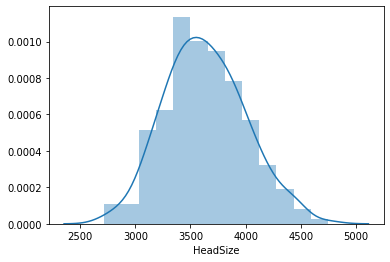

In [12]:
sns.distplot(data['HeadSize'])

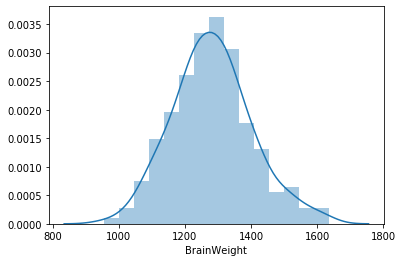

In [13]:
sns.distplot(data['BrainWeight'])

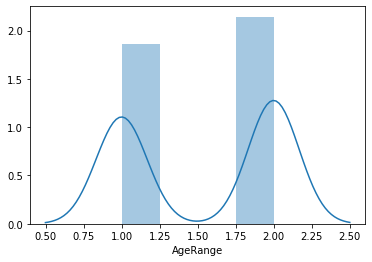

In [14]:
sns.distplot(data['AgeRange'])

In [15]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

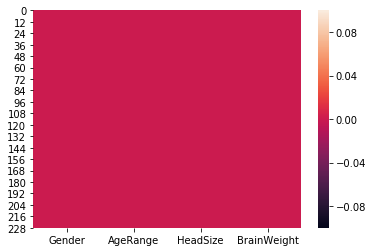

In [16]:
sns.heatmap(data.isnull())

# summary stats:

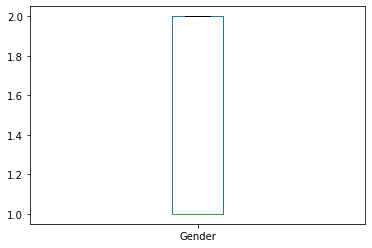

In [17]:
data['Gender'].plot.box()

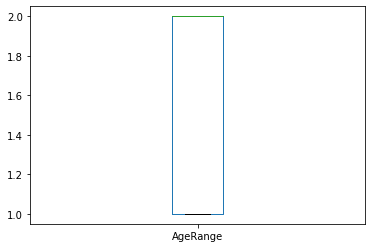

In [18]:
data['AgeRange'].plot.box()

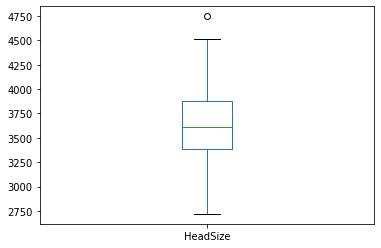

In [19]:
data['HeadSize'].plot.box()

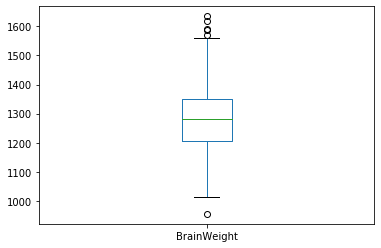

In [20]:
data['BrainWeight'].plot.box()

Gender            AxesSubplot(0.125,0.536818;0.168478x0.343182)
AgeRange       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
HeadSize       AxesSubplot(0.529348,0.536818;0.168478x0.343182)
BrainWeight    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
dtype: object

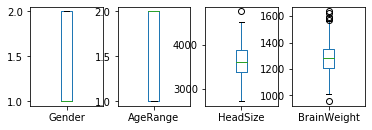

In [21]:
data.plot(kind='box',subplots=True,layout=(2,4))

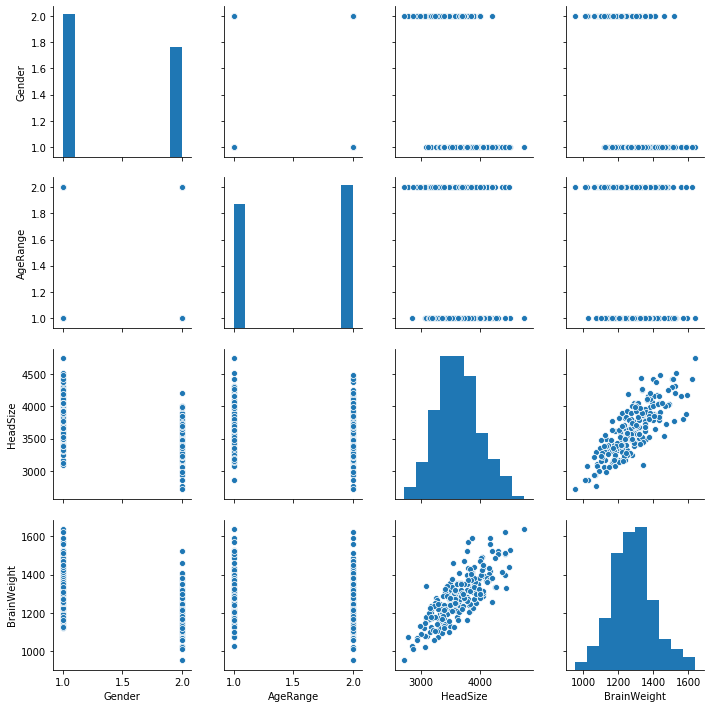

In [22]:
sns.pairplot(data)

<function matplotlib.pyplot.show(*args, **kw)>

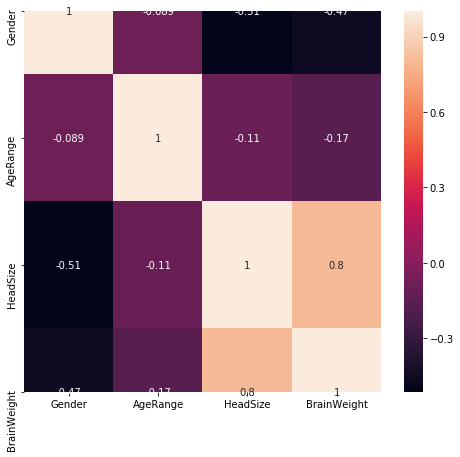

In [23]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

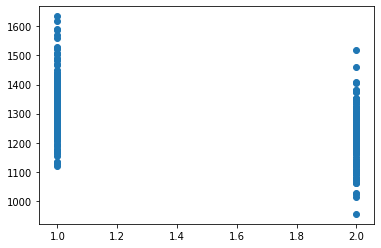

In [24]:
plt.scatter(data['Gender'],data['BrainWeight'])

In [25]:
collist=data.columns.values
ncol=4
nrows=10

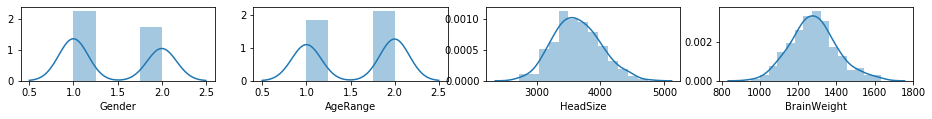

In [26]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])

# Removing outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [28]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


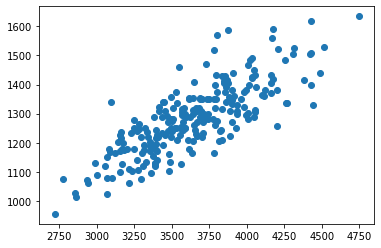

In [29]:
x=data['HeadSize']
y=data['BrainWeight']
plt.scatter(x,y)
plt.show()

# correlation

In [30]:
data_new=data[(z<3).all(axis=1)]

In [31]:
data.shape

(237, 4)

In [32]:
data_new.shape

(236, 4)

In [33]:
data=data_new

In [34]:
data.shape

(236, 4)

# Now Training

In [35]:
x=data.iloc[:,0:-1]
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [36]:
y=data.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [37]:
x.shape

(236, 3)

In [38]:
y.shape

(236,)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=57)

In [40]:
x_train.shape

(184, 3)

In [41]:
y_train.shape

(184,)

In [42]:
x_test.shape

(52, 3)

In [43]:
y_test.shape

(52,)

In [44]:
lm=LinearRegression()

In [45]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm.coef_

array([-30.7622566 , -29.07060901,   0.23968925])

In [47]:
lm.intercept_

498.2758014747268

In [48]:
data.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [49]:
lm.score(x_train,y_train)

0.6639222083309171

# predict the value

In [50]:
pred=lm.predict(x_test)

In [51]:
print('predicted Brainweight:',pred)
print('actual Brainweight',y_test)

predicted Brainweight: [1275.60927371 1319.21889423 1168.69404569 1212.55717831 1248.04501004
 1315.87706759 1296.22254915 1249.72283479 1111.57979452 1262.41254215
 1266.74077149 1334.40134963 1225.74008701 1217.60447539 1461.91603024
 1316.34262324 1095.04123632 1381.79161113 1428.77070399 1212.48896846
 1270.81548872 1146.40294551 1238.13571813 1367.63612258 1194.03289627
 1367.87581183 1180.13091981 1175.40534467 1164.61932845 1253.78372918
 1334.09345053 1342.22906216 1344.160399   1301.65336919 1192.11538227
 1273.84941627 1421.88792561 1356.93213906 1191.22483512 1274.15731537
 1313.46635225 1234.84827849 1269.20587383 1267.93921773 1311.87056019
 1227.91111311 1291.49697401 1328.34090855 1241.55957747 1386.26367418
 1224.07608512 1379.15502939]
actual Brainweight 123    1180
168    1374
142    1200
167    1190
115    1275
125    1350
94     1290
88     1280
196    1120
169    1306
83     1245
1      1297
150    1322
67     1154
52     1335
136    1260
213    1130
73     1432
63

In [52]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
4621.722381004189


In [53]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4912216312160159


# predicting new value

In [54]:
t=np.array([1,1,4512])

In [55]:
t.shape

(3,)

In [56]:
t=t.reshape(1,-1)
lm.predict(t)

array([1519.92082856])